In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel
import seaborn as sns
import scipy.stats as st
from scipy.special import erfinv,erf,logit,erfc
import math
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def logistic_func(x):
    num = 1+np.exp(-8*x+4)
    return 2/num


In [3]:
x_n = np.linspace(0,2,50)
f_latent = logistic_func(x_n)
generate_data = lambda x,s: np.random.normal(logistic_func(x),s**2)
sigma2_n = 0.25
y_data = generate_data(x_n,sigma2_n)


In [4]:
# with pm.Model() as gp_model:
#     l_ = pm.HalfCauchy('l_',20)
#     eta_ = pm.HalfCauchy('eta_',1)
#     s_n = pm.HalfNormal('s_n',1)
#     kernel = (eta_**2)*pm.gp.cov.Matern32(1,l_)
#     gp_default = pm.gp.Marginal(cov_func=kernel)
#     gp_default.marginal_likelihood('lik',x_n.reshape(-1,1),y_data,noise=s_n)
#     trace = pm.sample(2000,tune=2000,cores=2)
kernel = ConstantKernel() * Matern(length_scale=10.0, length_scale_bounds=(10, 100.0), nu=1)
gp_default = GaussianProcessRegressor(kernel=kernel,alpha=sigma2_n, n_restarts_optimizer=10) #for checking
gp_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10) # to apply monotonic
gp_default.fit(np.atleast_2d(x_n).T,y_data)
gp_.fit(np.atleast_2d(x_n).T,y_data)

/home/vinay/miniconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=10, nu=1),
                         n_restarts_optimizer=10)

In [5]:
#map_estimate = pm.find_MAP(model=gp_model)
# map_estimate = {'l__log__': np.array(0.47877408),
#                 'eta__log__': np.array(0.20080079),
#                 's_n_log__': np.array(-2.8134637),
#                 'l_': np.array(1.61409445),
#                 'eta_': np.array(1.22238123),
#                 's_n': np.array(0.05999682)}


In [6]:
from gp_monotonic import gp_monotonic

In [7]:
gp_mon = gp_monotonic(kernel,gp_,x_n,y_data)
#gp_mon = gp_monotonic(gp_model,gp_default,map_estimate,x_n,y_data)

No. of virtual points :  21
v_new  0.25
Iteration  0
factor  0
factor  1
factor  2
factor  3
factor  4
factor  5
factor  6
factor  7
factor  8
factor  9
factor  10
factor  11
factor  12
factor  13
factor  14
factor  15
factor  16
factor  17
factor  18
factor  19
factor  20
Iteration  1
factor  0
factor  1
factor  2
factor  3
factor  4
same variance from removing new approximate factor iiii
0*infinity iiii
3881.9586660038985
factor  5
same variance from removing new approximate factor iiii
0*infinity iiii
3874.3347073776827
factor  6
same variance from removing new approximate factor iiii
0*infinity iiii
3869.6743705877807
factor  7
same variance from removing new approximate factor iiii
0*infinity iiii
3865.959523730446
factor  8
same variance from removing new approximate factor iiii
0*infinity iiii
3862.338792524494
factor  9
same variance from removing new approximate factor iiii
0*infinity iiii
3857.8546665741474
factor  10
same variance from removing new approximate factor iiii
0*

In [8]:
x_star = np.linspace(0,2,100)
f_pred_m,f_cov = gp_mon.predict(x_star,return_cov=True)
f_pred = gp_default.predict(x_star.reshape(-1,1))

K_starf shape :  (100, 71)
K_star2 shape :  (100, 100)


In [9]:
err = np.linalg.eig(f_cov)

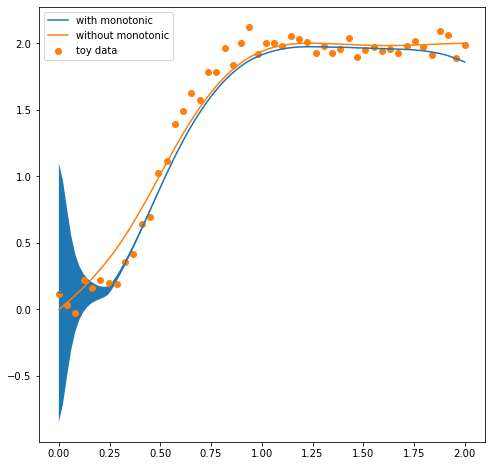

In [10]:
plt.figure(figsize=(8,8))
plt.plot(x_star,f_pred_m,label='with monotonic')
plt.fill_between(x_star,f_pred_m+err[0],f_pred_m-err[0])
plt.plot(x_star,f_pred,label='without monotonic')
plt.scatter(x_n,y_data,label='toy data')
plt.legend()